# Linear Regression on Boston Housing Dataset

a Boston Housing datasettel dolgoztunk, ami információt tartalmaz különböző bostoni házakról. Ebben a táblában 506 rekordunk és 14 változónk van. A célunk az volt, hogy megtudjuk, mely tényezők befolyásolják a legjobban a házak árának változását.
Változóink:

CRIM: Az egy főre jutó bűnözés aránya városrészenként.

ZN: A 25000 négyzetláb feletti telekhez tartozó lakóterület aránya.

INDUS: A nem kereskedelmi üzleti hektár aránya városrészenként.

CHAS: A Charles River dummy változó (1, ha a környéken van folyópart; egyébként 0).

NOX: Nitrogén-monoxid-koncentráció.

RM: Lakásonkénti átlagos szobaszám.

AGE: Az 1940 előtt épített házak aránya, melyekben a tulajdonos lakik.

DIS: Súlyozott távolságok 5 bostoni foglalkoztatási központtól.

RAD: A sugárirányú autópályák elérhetőségének mutatója.

TAX: Teljes értékű ingatlanadó mértéke 10 000 dolláronként.

PTRATIO: A diák-tanár arány városrészenként.

B: 1000(Bk-0,63)2, ahol Bk az afro-amerikai származású emberek aránya városrészenként.

LSTAT: A népesség alacsonyabb státuszú egyedeinek aránya (%-ban).

MEDV: A tulajdonos által lakott házak medián értéke 1000 dollárban.

A kétváltozós regressziónál azt vizsgáltuk, hogy a lakásárat (MEDV) mennyiben befolyásolja a szobaszám (RM), a többváltozósnál pedig bevettük a modellezésbe az LSTAT változót is, tehát azt, hogy a környéken élő szegényebbek aránya mennyiben befolyásolja a lakásárat.




In [78]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

In [79]:
boston = pd.read_csv(r'F:\pfile\boston.csv')
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [80]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Data preprocessing**

In [81]:
# Változónként szummázzuk a null rekordokat.
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Adatvizualizáció histogrammal**

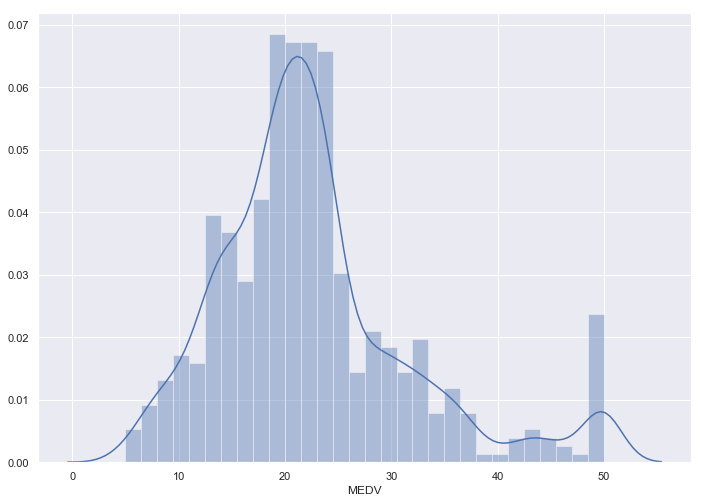

In [82]:
# Ellenőrizzük az eloszlást, mert már mint írva volt meg kell felelnie a az
# Y / eredmény változónknak a normális eloszlás feltételéhez a regresszió számításhoz.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()
# Néhány outlier van, de nagyon hasonlít a normál eloszláshoz. EZ EGY Jó JEL, alkalmazhatjuk a regressziószámítást.

**Korrelációs matrix**

In [83]:
correlation_matrix = boston.corr().round(2)

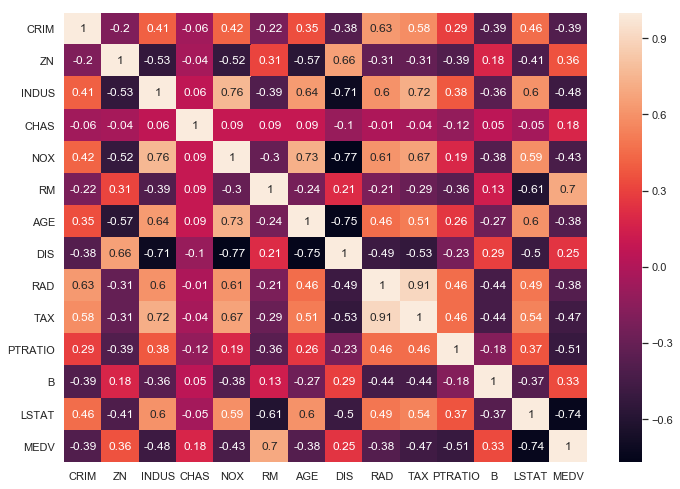

In [84]:
# Most nézzük meg a korrelációt, mely mutatja a kapcsolat erősségét ér irányát, értéke -1 és 1 között lehet. 
# Minél sötétebb a cella, annál erősebb NEGATÍV irányú a kapcsolat, míg minnél világosabb, annál erősebb a POZITÍV irányú kapcsolat
sns.heatmap(data=correlation_matrix, annot=True)

**Értelmezése:**

* Nekünk a minél erősebb korrelációs értékek a fontosak, mind pozitív mind negatív irányban, minél jobban közelít +-1-hez annál jobb.
* MEDV és RM között 0,7 (pozitiv irányú szoros kapcsolat van) és MEDV-LSTAT között -0,74 (erős negatív irányú kapcsolat van)
* MEDV-RM: A szobák száma befolyásolja a házak árát, pozitív irány:minél több szoba van benne, annál drágább az ingatlan.
* MEDV-LSTAT minél alacsonyabb státuszú/beosztású emberek laknak a közelben, annál olcsóbb az ingatlan értéke.



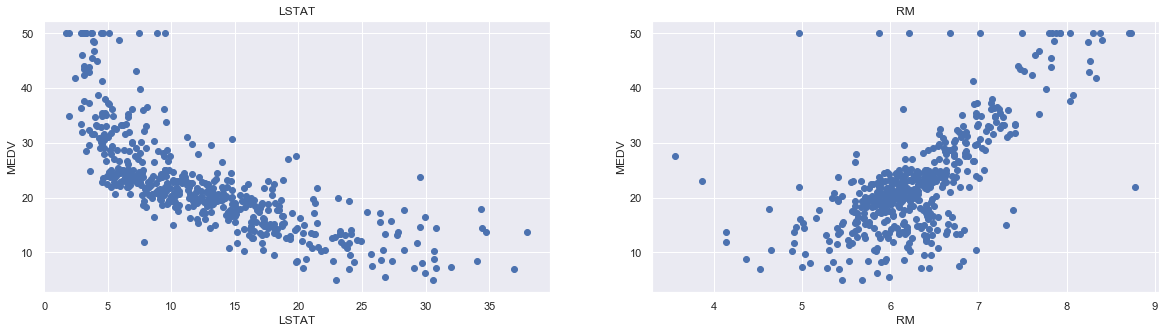

In [85]:
#Elhelyezzük a pontokat egy kis szabad szemes vizsgálathoz
#függő változónk a MEDV(ár)-Y
#független pedig először LSTAT(X1)
#majd RM (X1 ezen változó elnevezése is, mivel első magyarázó változónk a külön modell miatt)

plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

**Előkészítjük az adatokat tanulásra**

In [86]:
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']

**Szétválogatjuk az adatokat tanuló és tesztelő halmazokra**

In [87]:
from sklearn.model_selection import train_test_split

# véletlenszerűen tanuló 80% : tesztelő 20% adatok
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


**Az sklearn LinearRegression modulját használjuk**

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
# aodelt először a tanuló halmazon próbáljuk ki

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# majd a tesztelőn

y_test_predict = lin_model.predict(X_test)
# a négyzetes hiba
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-négyzet értéke
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.6371293350711955
R2 score is 0.6300745149331701


The model performance for testing set
--------------------------------------
RMSE is 5.137400784702911
R2 score is 0.6628996975186953


**Az illesztést megcsináljuk az összes változóra**

In [90]:
df = pd.read_csv(r'F:\pfile\Boston.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [91]:
y=df.pop('MEDV')
X_train, X_test, Y_train, Y_test = train_test_split(df.to_numpy(),y, test_size=0.2)
model = LinearRegression().fit(X_train, Y_train)

In [92]:
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [93]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 4.680954671283101
R2 score is 0.7460428558300956




In [94]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
RMSE is 4.721564435270252
R2 score is 0.7106732700314915
